### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [0]:
# Numerical libraries
import numpy as np   
from sklearn.cluster import KMeans
# to handle data in form of rows and columns 
import pandas as pd    
# importing ploting libraries
import matplotlib.pyplot as plt   
from sklearn import metrics
from google.colab import files
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import warnings
warnings.simplefilter('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#/content/drive/My Drive/Great_Lakes_Assignments/Lab Internal | Residency 4/vehicle.csv

In [53]:
vehicle_data = pd.read_csv("/content/drive/My Drive/Great_Lakes_Assignments/Lab Internal | Residency 4/vehicle.csv")
print("File read successfully")

File read successfully


In [0]:
vehicle_data = vehicle_data.dropna(axis = 0, how ='any')

In [55]:
vehicle_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [56]:
vehicle_data.shape

(813, 19)

In [57]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

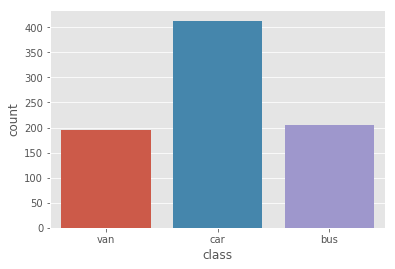

In [58]:
sns.countplot(vehicle_data['class']);

### Check for any missing values in the data 

In [59]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

###There are no missing values

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [60]:
data = vehicle_data.drop('class',axis=1)
data.shape

(813, 18)

In [61]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02
mean,-2.425284e-16,-4.642999e-16,-2.351542e-16,3.665238e-16,-2.047016e-16,-1.349201e-16,3.714399e-16,-2.062038e-16,-2.651972e-16,-7.398756e-16,-3.031605e-17,-3.550529e-17,3.348422e-16,1.312159e-16,-1.693329e-17,9.845889e-17,-1.169490e-15,3.482249e-16
std,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00
min,-2.510344e+00,-1.921444e+00,-2.665447e+00,-1.937757e+00,-1.854258e+00,-1.411767e+00,-1.710835e+00,-1.922008e+00,-1.383740e+00,-2.062109e+00,-1.874279e+00,-1.452266e+00,-2.019423e+00,-1.793474e+00,-1.291420e+00,-1.422141e+00,-2.110457e+00,-1.992013e+00
25%,-8.089782e-01,-7.819133e-01,-7.635057e-01,-8.363933e-01,-5.992534e-01,-3.420870e-01,-6.824590e-01,-1.024408e+00,-6.060138e-01,-7.513773e-01,-6.863524e-01,-6.872619e-01,-7.815035e-01,-7.227236e-01,-8.847879e-01,-7.496057e-01,-8.096219e-01,-6.396066e-01
50%,-7.982157e-02,-1.307527e-01,-1.929234e-01,-6.246222e-02,-9.725132e-02,-1.281510e-01,-3.497491e-01,2.578765e-01,-2.171510e-01,-1.305046e-01,-3.010789e-01,-4.246486e-01,-3.875161e-02,-1.873484e-01,-7.152328e-02,-1.891593e-01,3.400092e-03,1.718371e-01
75%,7.708611e-01,6.831980e-01,1.011639e+00,7.710020e-01,4.047507e-01,2.997208e-01,8.903515e-01,6.425619e-01,9.494376e-01,7.663115e-01,9.189540e-01,8.427456e-01,7.349483e-01,3.480268e-01,5.384252e-01,7.075550e-01,6.538177e-01,7.127995e-01
max,3.079857e+00,2.311100e+00,1.899212e+00,4.878790e+00,9.566288e+00,9.926837e+00,2.916857e+00,2.565989e+00,3.282615e+00,2.766901e+00,4.225885e+00,3.309026e+00,2.901308e+00,8.378655e+00,3.181535e+00,3.173519e+00,2.767675e+00,2.065206e+00


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [0]:
cluster_errors = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [31]:
# KMeans Clustring Algorithm
# Label, Intertia and Centroid
cluster_range = range( 1, 11)  
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init=5)
  clusters.fit(data_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5741.186965
4,5,5185.564102
5,6,4707.860902
6,7,4349.748827
7,8,4129.616750
8,9,3845.951843
9,10,3700.438312


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

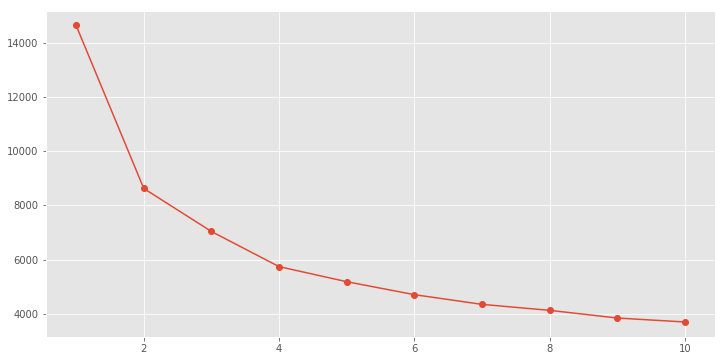

In [63]:
# Elbow plot to identify number of clusters

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

### Find out the optimal value of K
###From the above elbow plot we can say the optimal value of K is 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [0]:
# Number of clusters

kmeans = KMeans(n_clusters=4)

# Fitting the input data

kmeans = kmeans.fit(data_scaled)

# Getting the cluster labels

labels = kmeans.predict(data_scaled)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [65]:
# Centroid values

centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")

print(centroids) # From sci-kit learn

Centroid values
[[-8.73939377e-01 -4.90666958e-01 -8.19987596e-01 -1.00914774e+00
  -4.88356546e-01 -2.75961304e-01 -7.59559699e-01  8.28143534e-01
  -7.31863992e-01 -4.54863559e-01 -7.72863866e-01 -7.64634145e-01
  -3.79292105e-01  6.60977993e-01 -1.09968514e-01 -2.97172612e-01
  -9.41479276e-01 -9.74511472e-01]
 [ 1.15736176e+00  1.18688991e+00  1.21376707e+00  9.73764988e-01
   9.46906393e-02  2.19180218e-01  1.30158336e+00 -1.21649970e+00
   1.30627647e+00  1.10069002e+00  1.20916828e+00  1.31287479e+00
   1.09370231e+00 -1.03892856e-01  1.58104393e-01  2.69747448e-01
  -1.70122247e-03  1.87217384e-01]
 [-7.33024343e-01  7.27349604e-02 -2.72170954e-01  2.94768327e+00
   6.83665190e+00  8.69670551e+00 -5.35008001e-01  4.66247771e-01
  -5.57405972e-01  2.83410527e-01  1.69752769e+00 -5.88068272e-01
   2.12700856e-01  4.96563826e+00 -2.74839440e-01 -2.31192779e-01
  -7.07994144e-01 -4.53650721e-01]
 [-1.77926274e-01 -6.12019616e-01 -2.97587802e-01  2.04512354e-02
   2.01668080e-01 -1.

In [38]:
centroids.dtype

dtype('float64')

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [0]:
centroids_df = pd.DataFrame(centroids, columns = data.columns)

In [67]:
centroids_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.873939,-0.490667,-0.819988,-1.009148,-0.488357,-0.275961,-0.759560,0.828144,-0.731864,-0.454864,-0.772864,-0.764634,-0.379292,0.660978,-0.109969,-0.297173,-0.941479,-0.974511
1,1.157362,1.186890,1.213767,0.973765,0.094691,0.219180,1.301583,-1.216500,1.306276,1.100690,1.209168,1.312875,1.093702,-0.103893,0.158104,0.269747,-0.001701,0.187217
2,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651
3,-0.177926,-0.612020,-0.297588,0.020451,0.201668,-0.180274,-0.431799,0.286320,-0.463195,-0.574021,-0.397748,-0.435651,-0.641056,-0.709096,-0.028642,0.053769,0.963653,0.814107


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [68]:
kmeans.labels_

array([3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 1, 0, 3, 1, 0, 0, 3, 3, 1,
       3, 0, 1, 1, 0, 0, 3, 3, 1, 3, 0, 2, 1, 0, 1, 0, 0, 3, 1, 0, 0, 0,
       0, 3, 0, 3, 1, 3, 1, 3, 3, 0, 1, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 1,
       3, 0, 3, 1, 3, 0, 0, 1, 3, 0, 3, 1, 3, 0, 3, 0, 1, 3, 1, 0, 0, 1,
       0, 0, 1, 0, 2, 3, 3, 0, 1, 1, 0, 0, 1, 3, 0, 0, 0, 0, 3, 1, 1, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 1, 1, 3, 3, 0, 1, 2, 0, 3, 0, 3, 3, 1,
       0, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 0, 3, 0, 1, 3, 0, 1, 1,
       3, 1, 0, 0, 1, 1, 3, 1, 0, 3, 3, 3, 0, 1, 0, 3, 0, 1, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 0, 1, 0, 0, 0, 0, 3, 1, 1, 3, 0, 3, 0, 1, 3, 0, 3,
       1, 0, 0, 1, 0, 3, 1, 0, 0, 0, 3, 1, 3, 1, 0, 0, 0, 0, 1, 3, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 3, 3, 1, 0, 1, 0, 3, 0, 1, 3, 3, 1, 1, 0,
       3, 3, 3, 1, 0, 3, 3, 0, 0, 3, 3, 1, 3, 0, 0, 1, 3, 3, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 3, 1, 3, 1, 0, 3, 3, 1, 3, 3, 3, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 3, 0,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [0]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [90]:
a.shape

(100, 2)

In [91]:
b.shape

(50, 2)

In [92]:
c.shape

(100, 2)

In [0]:
df = pd.DataFrame(a)
df1 = pd.DataFrame(b)
df2 = pd.DataFrame(c)

In [0]:
data = [df,df1,df2]
dataframe = pd.concat(data)

In [106]:
dataframe.shape

(250, 2)

In [107]:
dataframe.head()

,0,1
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


### 10. Use scatter matrix to print all the 3 distributions

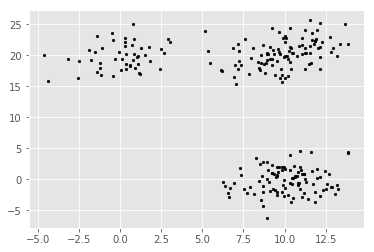

In [113]:
# Getting the values and plotting it

f1 = dataframe[0].values

f2 = dataframe[1].values

plt.scatter(f1, f2, c='black', s=7);

### 11. Find out the linkage matrix

In [0]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [0]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [0]:
X = dataframe

In [131]:
# Case 1: Ward Method
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z , pdist(X,metric='euclidean'))
print("Ward",c)

Ward 0.9538891172890785


### 12. Plot the dendrogram for the consolidated dataframe

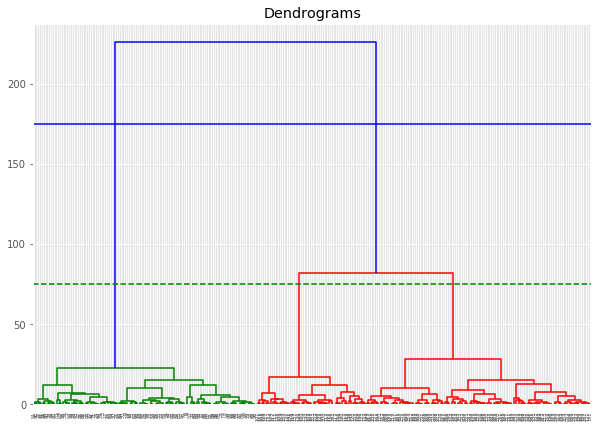

In [139]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=175, color='b', linestyle='-')
plt.axhline(y=75, color='g', linestyle='--');

In [127]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [128]:
X['labels'] = cluster.labels_
X.groupby(["labels"]).count()

,0,1
labels,,
0,101,101
1,100,100
2,49,49


### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

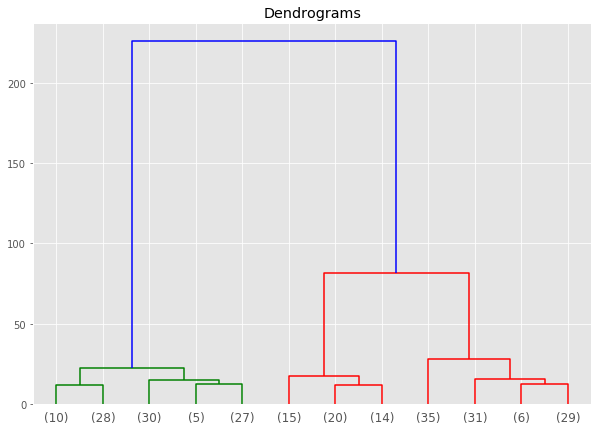

In [136]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'),p=12,truncate_mode='lastp')

*Question 14 and 15 are not done as concept are not toughts and were cancelled in internal lab*

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [0]:
https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [148]:
sch.fcluster(Z, t=0.33)

array([ 42,  37,  53,  19,   6,  52,  57,   8,  24,  42,  27,   3,  16,
        30,  36,  34,  55,  19,  28,  24,  22,  22,  33,  17,  43,  23,
        61,  39,  11,  20,  25,  15,  39,  28,   5,  57,  10,  49,  38,
         9,   4,  16,  32,  11,  53,  13,  51,  14,   3,  48,  44,   1,
        60,  21,  21,  34,   8,  40,  33,  50,  47,  36,   6,  29,  26,
        51,  31,  46,  54,  30,  40,  18,  54,  31,  12,   2,  37,  52,
         4,  62,  41,   2,  45,   7,  58,  13,  38,  59,  56,  43,   1,
        46,  35,  29,  15,   5,  50,  17,  60,  45,  82,  63,  77,  79,
        70,  90,  68,  77,  64,  79,  76,  66,  67,  82,  68,  87,  83,
        86,  85,  74,  91,  63,  80,  87,  71,  92,  75,  65,  64,  90,
        93,  84,  65,  92,  76,  69,  72,  73,  89,  85,  88,  69,  83,
        80,  72,  89,  81, 140,  66,  78, 129, 101,  95, 150, 133, 148,
       126, 106, 147, 156, 143, 117, 103, 121, 119, 103, 138, 157, 108,
       124,  97,  96, 158, 100, 152, 118, 114, 127, 111, 147, 14

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 